In [1]:
import os
import gdal
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
home_dir = os.path.join(os.getenv("HOME"), "geodata", "geo411", "GEO411_FSH_Roda")
#home_dir = "D:/Geodaten/GEO411/03_development"
# change to home_dir
os.chdir(home_dir)

# Define paths

In [5]:
# get all the coherences
coherences = [x for x in glob.glob("./**/*", recursive=True) if x.split(os.sep)[-1] == "topophase.cor.geo.vrt" and "HH" not in x]

# sort the cohrences
coherences_sorted = sorted(coherences, key=lambda coherences: coherences.split(os.sep)[1])

In [7]:
a = "./20150821_20151002/interferogram/topophase.cor.geo.vrt"
a.split(os.sep)[1]

'20150821_20151002'

# Plot Coherences

IndexError: list index out of range

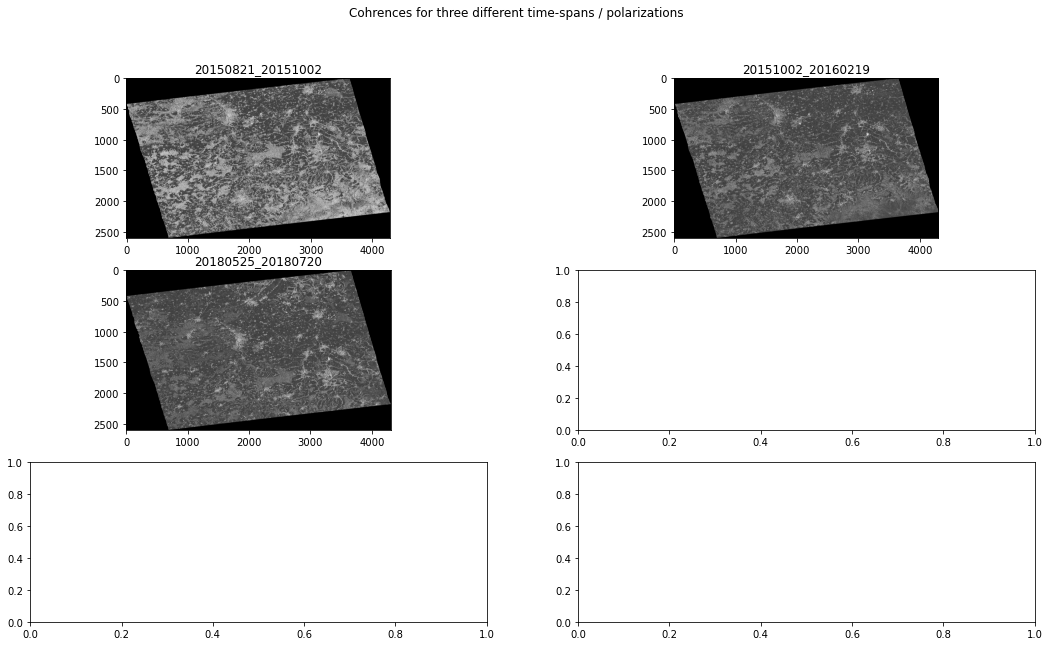

In [8]:
fig, axs = plt.subplots(3, 2, figsize=(18, 10))
i = 0
j = 0

fig.suptitle("Cohrences for three different time-spans / polarizations")
color = []
for c, coh in enumerate(coherences_sorted):
    name = coh.split(os.sep)[1]
    gdalobj = gdal.Open(coh, gdal.GA_ReadOnly)
    coh = gdalobj.GetRasterBand(2).ReadAsArray()
    if c < 2:
        axs[0,c].imshow(coh, cmap="gray")
        axs[0,c].set_title(name)
    elif 2 <= c < 4:
        axs[1,i].imshow(coh, cmap="gray")
        axs[1,i].set_title(name)
        i+=1
    else:
        axs[2,j].imshow(coh, cmap="gray")
        axs[2,j].set_title(name)
        color.append(axs[2,j].imshow(coh, cmap="gray"))
        j+=1
        
fig.colorbar(color[0], ax=axs, orientation="horizontal")

- this one is a little nicer...

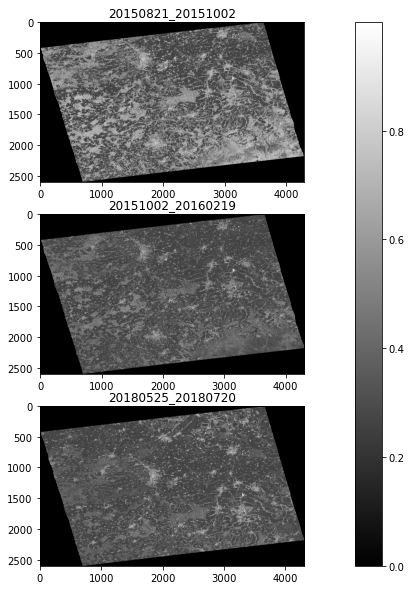

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(18, 10))
images = []
for ax, coh in zip(axs.flatten(), coherences_sorted):
    name = coh.split(os.sep)[1]
    gdalobj = gdal.Open(coh, gdal.GA_ReadOnly)
    coh_array = gdalobj.GetRasterBand(2).ReadAsArray()
    ax.imshow(coh_array, cmap="gray")
    images.append(ax.imshow(coh_array, cmap="gray"))
    ax.set_title(name)
fig.colorbar(images[0],ax=axs)

In [176]:
datetime.datetime.strptime("2015082", "%Y%m%d")

datetime.datetime(2015, 8, 2, 0, 0)

# Plot averages of coherences

- get dates

In [206]:
import datetime
dates = []
for i in coherences_sorted:
    date = i.split(os.sep)[1][0:8]
    date = datetime.datetime.strptime(date, "%Y%m%d")
    dates.append(date)
    

20150821
20150821
20151002
20151002
20180525
20180525


- get average coherences

In [186]:
avgs = []
for coh in coherences_sorted:
    gdalobj = gdal.Open(coh, gdal.GA_ReadOnly)
    coh_array = gdalobj.GetRasterBand(2).ReadAsArray()
    avg = np.average(coh_array)
    print(avg)
    avgs.append(avg)


0.32389104
0.3546368
0.2527355
0.2962402
0.24958284
0.28750765


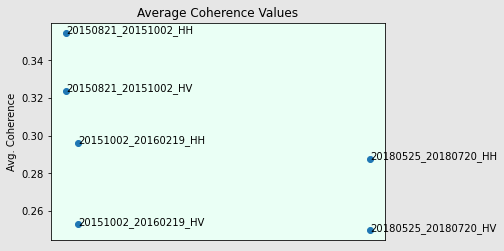

In [236]:
fig, ax = plt.subplots(facecolor=(.9,.9,.9))
ax.scatter(dates, avgs)
ax.get_xaxis().set_visible(False)
ax.set_xlabel("Date")
ax.set_ylabel("Avg. Coherence")
ax.set_facecolor('#eafff5')
ax.set_title("Average Coherence Values")

for i, txt in enumerate(coherences_sorted):
    name = txt.split(os.sep)[1]
    if "HH" in name:
        label = name
    else:
        label = name + "_HV"
    ax.annotate(label, (dates[i], avgs[i]))